# Sleep Tracking - Analysing my own sleep behaviour 
*The data is collected from my iPhone and Apple Watch. 
Tracked and exported with the sleep tracking app "Pillow"* 

I LOVE staying up late! </br>
The later it is, the more productive I become ; </br>
Working as a location manager at movie sets - from start working at 04:00am to filming through the night - no work day like the last one ; </br>
Traveling for 3 months through South-East-Asia ;

All of this should result in a pretty interesting sleep behaviour! </br>
Paired with my desire to change jobs and work as a data analyst, I´m pleased to welcome you to the anylsis of my sleep behaiour! 

# Table of Contents: 

1. [Import](#1-import-packages--csv-file)</br>
2. [First glimpse at the dataset](#2-first-glimpse-at-the-dataset)</br>
3. [Cleaning](#3-data-cleaning)</br>
    3.1. [transfrom columns in english](#31-transform-column-names-in-english)</br>
    3.2. [exploring column "Ist Nickerchen"(is it a nap)](#32-is-it-a-nap)</br>
    3.3. [exploring column "Anzahl der Audioaufnahmen"(nr of recorded audio files)](#33-recorded-audio)</br>
    3.4. [exploring column "Aufwachstimmung"(wake up mood) -> How important and diverse are the entrys](#34-wake-up-mood)</br>
    3.5. [explore column index11 (no column name) -> are there any entrys and what are the entrys?](#35-explore-the-column-with-an-empty-name) </br>
    3.6. [Convert Dtype of "Startzeit" (Startingtime) and "Endzeit"(Endingtime) to datetime ](#36-convert-the-start-and-end-columns-to-timeframes)</br>
    3.7. [Checking the timeframe of my dataset ](#37-checking-the-timeframe-of-my-dataset-first-and-last-recent-entry)</br>
    3.8. [Add column for the total lenght of sleep ](#38-add-column-for-the-total-lenght-of-sleep)</br>
4. [Analyse](#4-analyse)</br>
    4.1. [Descriptive Statistics](#41-descriptive-statistics)</br>
    4.2. [Sleep Quality - Total Time Asleep](#42-sleep-quality---total-time-asleep)</br>
    4.3. [Sleep Quality - Month Of The Year](#43-sleep-quality---month-of-the-year)</br>
    4.4. [Sleep Quality - Weekday ](#44-sleep-quality---weekday)</br>
    4.5. [Bed Time - Wake Up Time](#45-when-did-i-go-to-bed---when-did-i-wake-up)</br>
    4.6. [Sleep Quality - Time I Went To Bed](#46-sleep-quality---time-i-went-to-bed)</br>
    4.7. [Sleep Quality - Time I Woke Up ](#47-sleep-quality---time-i-woke-up)</br>
    4.8. [Difference in Sleep Quality > and < 50](#48-what-is-the-difference-between-sleep-sessions-with-a-sleep-quality-of-more-and-less-then-50)</br>
    4.7. [Sleep Quality - Correlation to next and last Sleep Quality](#49-correlation-between-previous--next-sleep-quality)</br>
5. [Joining activity](#5-importing-activity-data)</br>
    5.1. [Joining activity- & sleep-dataset](#51-joining-activity-dataset-and-sleep-dataset)</br>
    5.2. [Inspect and clean joined dataset](#52-inspect-and-clean-joined-dataset)</br>
    5.3. [Correlations between activity & sleep](#53-correlation-between-datasets)</br>
6. [Conclusion](#6-conclusion)


# 1. Import packages + csv file

In [10]:
# Importing all relevant packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
from collections import Counter
import datetime

In [11]:
# Importing my sleep dataset  
raw_data = pd.read_csv("PillowData.csv")

<a id='2'></a>
# 2. First glimpse at the dataset

In [12]:
print(raw_data.info()) # .info() gives a great overview about the entries, columns, datatypes and null values 
print(raw_data.head()) # .head() displays the first entrys of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Startzeit                   352 non-null    object
 1    Endzeit                    352 non-null    object
 2    Im Bett (Min.)             352 non-null    int64 
 3    Ist Nickerchen             352 non-null    object
 4    Schlafqualität             352 non-null    int64 
 5    Wachdauer (Min.)           352 non-null    int64 
 6    REM-Schlafdauer (Min.)     352 non-null    int64 
 7    Leichtschlafdauer (Min.)   352 non-null    int64 
 8    Tiefschlafdauer (Min.)     352 non-null    int64 
 9    Anzahl der Audioaufnahmen  352 non-null    int64 
 10   Aufwachstimmung            352 non-null    object
 11                              352 non-null    object
dtypes: int64(7), object(5)
memory usage: 33.1+ KB
None
                             Startzeit                 

# 3. Data Cleaning 

## 3.1. Transform column names in english
Since the analysis is performed in english I will transform all column names in english. </br>
All column names from index 1 ongoing are starting with a space. By renaming each column the space will be cleaned.

In [13]:
#Because the original column names are containing spaces, I will adress the changes by referring to the column index
name_data = raw_data.rename(columns={raw_data.columns[0]: 'start', 
                                    raw_data.columns[1]: 'end', 
                                    raw_data.columns[2]:'min_in_bed', 
                                    raw_data.columns[3]:'nap', 
                                    raw_data.columns[4]:'sleep_quality', 
                                    raw_data.columns[5]:'min_awake', 
                                    raw_data.columns[6]:'min_rem_sleep', 
                                    raw_data.columns[7]:'min_light_sleep', 
                                    raw_data.columns[8]:'min_deep_sleep', 
                                    raw_data.columns[9]:'nr_of_recorded_audio', 
                                    raw_data.columns[10]:'wake_up_mood', 
                                    raw_data.columns[11]:'empty'})
print(name_data.info()) #print the info to check if renaming was successful

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   start                 352 non-null    object
 1   end                   352 non-null    object
 2   min_in_bed            352 non-null    int64 
 3   nap                   352 non-null    object
 4   sleep_quality         352 non-null    int64 
 5   min_awake             352 non-null    int64 
 6   min_rem_sleep         352 non-null    int64 
 7   min_light_sleep       352 non-null    int64 
 8   min_deep_sleep        352 non-null    int64 
 9   nr_of_recorded_audio  352 non-null    int64 
 10  wake_up_mood          352 non-null    object
 11  empty                 352 non-null    object
dtypes: int64(7), object(5)
memory usage: 33.1+ KB
None


## 3.2. Is it a nap? 
what does the column look like and how many diverse entrys are there - Do they add value to this analysis? 

In [14]:
# Grouping by nap to see how many distinct values there are and how many entries each value has 
name_data.groupby('nap').size()
# translation: 'Ja' = 'Yes' ; 'Nein' = 'No'

nap
 Ja       73
 Nein    279
dtype: int64

In [15]:
# Lets try to figure out when a nap is counted as a nap 
# pulling the longest nap: 
naps = name_data[name_data['nap'] == " Ja"] #creating a nap only dataframe 
naps['min_in_bed'].max() #checking for the longest time in bed 

178

In [16]:
# compare value of longest nap to shortest non nap to help decide to keep or drop nap column 
non_naps = name_data[name_data['nap'] == " Nein"] # creating a non-nap dataframe
non_naps["min_in_bed"].min() # checking for the shortest non nap

184

The difference between the longest nap and shortest non nap is 6 minutes and both values are around 180 min (3 hours). 
I decide to drop the whole column. In case a differnce between nap and non nap would add value, I will use the 3h mark on my further analysis.

In [17]:
# dropping the nap column
name_data.drop(columns="nap", inplace=True)

## 3.3. recorded audio 
explore the column and decide to keep, or drop it

In [18]:
# Checking for different entrys in the column
name_data.groupby('nr_of_recorded_audio').size()

nr_of_recorded_audio
0     349
18      1
21      1
43      1
dtype: int64

Since there are only 3 recordings while I was asleep and an analysis of the specific recordings won´t be included in this work, I will drop the whole column. 

In [19]:
# dropping the recordings column
name_data.drop(columns="nr_of_recorded_audio", inplace=True)

## 3.4. Wake up mood 
explore the column and decide to keep or drop it 

In [20]:
# Counting the entrys 
name_data.groupby('wake_up_mood').size()

#translation of entrys: 
    # Schlecht = bad
    # Unbestimmt = indefinite 
    # Gut = good 

wake_up_mood
 Gut             1
 Schlecht        1
 Unbestimmt    350
dtype: int64

Similiar to the recordings there are only a few entrys for my wake up mood. 
Because of that the column gets dropped. 

In [21]:
# dropping the mood column
name_data.drop(columns="wake_up_mood", inplace=True)

## 3.5. Explore the column with an empty name 

In [22]:
# Selecting all unique values 
list(name_data['empty'].unique())

[' ']

There are only blanc spaces in this column, so it will be dropped

In [23]:
# dropping the empty column
name_data.drop(columns="empty", inplace=True)

## 3.6. Convert the start and end columns to timeframes 

In [24]:
# Closer look at the format of the columns 
print(name_data[['start', 'end']])

                                   start                                   end
0    Optional(2021-08-11 00:18:20 +0000)   Optional(2021-08-11 07:30:24 +0000)
1    Optional(2021-08-11 22:46:51 +0000)   Optional(2021-08-12 06:16:45 +0000)
2    Optional(2021-08-12 22:09:07 +0000)   Optional(2021-08-13 05:35:22 +0000)
3    Optional(2021-08-13 23:23:53 +0000)   Optional(2021-08-14 05:43:48 +0000)
4    Optional(2021-08-14 13:08:56 +0000)   Optional(2021-08-14 14:43:47 +0000)
..                                   ...                                   ...
347  Optional(2022-10-15 03:53:41 +0000)   Optional(2022-10-15 11:26:17 +0000)
348  Optional(2022-10-17 02:35:26 +0000)   Optional(2022-10-17 11:00:00 +0000)
349  Optional(2022-10-18 20:20:37 +0000)   Optional(2022-10-18 23:55:26 +0000)
350  Optional(2022-10-19 16:36:01 +0000)   Optional(2022-10-19 17:55:31 +0000)
351  Optional(2022-10-19 18:02:01 +0000)   Optional(2022-10-19 18:40:31 +0000)

[352 rows x 2 columns]


Only the "yyyy-mm-dd hh:mm:ss" part of the entrys is important. </br> The rest will be dropped

In [25]:
# extracting yyyy-mm-dd hh-mm-ss from both columns 
name_data['start'] = name_data['start'].str.slice(9,-7) #Because the column types are "object", I slice the string
name_data['end'] = name_data['end'].str.slice(10,-7) #Entrys containing an extra space at the beginning
name_data.head()

,start,end,min_in_bed,sleep_quality,min_awake,min_rem_sleep,min_light_sleep,min_deep_sleep
0,2021-08-11 00:18:20,2021-08-11 07:30:24,432,72,75,60,164,133
1,2021-08-11 22:46:51,2021-08-12 06:16:45,450,76,76,47,163,163
2,2021-08-12 22:09:07,2021-08-13 05:35:22,446,93,13,90,156,187
3,2021-08-13 23:23:53,2021-08-14 05:43:48,380,85,19,55,162,144
4,2021-08-14 13:08:56,2021-08-14 14:43:47,95,87,0,18,51,25


In [26]:
# Convert start and end to datetime
name_data['start'] = pd.to_datetime(name_data['start'])
name_data['end'] = pd.to_datetime(name_data['end'])
name_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   start            352 non-null    datetime64[ns]
 1   end              352 non-null    datetime64[ns]
 2   min_in_bed       352 non-null    int64         
 3   sleep_quality    352 non-null    int64         
 4   min_awake        352 non-null    int64         
 5   min_rem_sleep    352 non-null    int64         
 6   min_light_sleep  352 non-null    int64         
 7   min_deep_sleep   352 non-null    int64         
dtypes: datetime64[ns](2), int64(6)
memory usage: 22.1 KB


A closer look at the entrys on the start and end columns shows, that the time is in UTC. </br>
Because I live in Germany we need to add +2hrs </br>
For 2022-01-04 until 2022-04-01 I need to add +7hrs since I was on holiday

In [27]:
name_data['start'] = name_data['start'] + timedelta(hours=2)
name_data['end'] = name_data['end'] + timedelta(hours=2)
name_data.loc[(name_data['start'] >= '2022-01-04') & (name_data['start'] <= '2022-04-01'), 'start'] = name_data['start'] + timedelta(hours=5)
name_data.loc[(name_data['end'] >= '2022-01-04') & (name_data['end'] <= '2022-04-01'), 'end'] =  name_data['end'] + timedelta(hours=5)
name_data

NameError: name 'timedelta' is not defined

## 3.7. Checking the timeframe of my dataset: first and last recent entry 

In [ ]:
# Looking at min and max start to find the first and last entry 
print('first entry:',name_data['start'].min())
print('last entry:',name_data['start'].max())
print('nr. of entries:', name_data['start'].count())

first entry: 2021-08-11 02:18:20
last entry: 2022-10-19 20:02:01
nr. of entries: 352


### Note: There are only 352 entrys for a timeframe of more then a year. 
This could have many reasons: empty phone battery, sleep tracking deactivated, failed to recognise my sleep etc. </br>
Nevertheless it is important to have a closer look to ensure to recognise possible patterns and understand the given data better.   

Lets have a look in which months the most data is missing:

In [ ]:
# extracting only yyyy-mm-dd from start
data_date = name_data.copy() 
data_date['time'] = data_date['start'].dt.date

# Setting the Date values as index
data_date_timeindex = data_date.set_index('time')
 
# dates which are not in the sequence are returned (years & months)
missing = list(pd.date_range(start="2021-08-11", end="2022-10-19").difference(data_date_timeindex.index).strftime('%m.%y'))

# Count how many days are missing for each month
print(Counter(missing))

Counter({'01.22': 19, '11.21': 16, '10.21': 14, '07.22': 12, '09.21': 11, '12.21': 11, '08.22': 11, '09.22': 11, '06.22': 10, '04.22': 9, '02.22': 8, '05.22': 8, '03.22': 5, '10.22': 4, '08.21': 3})


October 2021 & January 2022 are the months with the most days without entrys (16), followed by November 2021 (15). </br>
The results need to be considered when doing the analysis. </br>

## 3.8. Add column for the total lenght of sleep 
Adding a new column for the total time asleep. 

In [ ]:
data_total = name_data.copy()
data_total['total_asleep'] = data_total["min_in_bed"] - data_total["min_awake"]

# 4. Analyse 

## 4.1. descriptive statistics 

In [ ]:
# First lets have a look at some descriptive statistics 
print(data_total.describe())

       min_in_bed  sleep_quality   min_awake  min_rem_sleep  min_light_sleep  \
count  352.000000     352.000000  352.000000     352.000000       352.000000   
mean   356.048295      82.687500   19.403409      66.525568       136.571023   
std    166.057212      10.005928   27.546631      36.601409        67.133711   
min     33.000000      32.000000    0.000000       0.000000         9.000000   
25%    250.750000      80.000000    0.000000      45.000000        83.000000   
50%    388.500000      85.000000   12.500000      73.000000       147.500000   
75%    470.000000      90.000000   29.000000      92.000000       181.500000   
max    776.000000      96.000000  214.000000     184.000000       297.000000   

       min_deep_sleep  total_asleep  
count      352.000000    352.000000  
mean       133.485795    336.644886  
std         66.644867    154.556867  
min          8.000000     33.000000  
25%         84.500000    227.500000  
50%        144.000000    375.000000  
75%        17

At the first glance all the data makes sense and no extrem or nonsense outliers are spotted.</br>
.descripe() gives a great feeling about some important staticts! </br>


From 33 Minutes power nap to around 12h total sleep time. </br>
On average around 5:30h asleep per tracked sleepsession.</br>

Next step: Have a look at the correlations </br>




In [ ]:
data_total.corr()

,min_in_bed,sleep_quality,min_awake,min_rem_sleep,min_light_sleep,min_deep_sleep,total_asleep
min_in_bed,1.000000,0.274457,0.485973,0.832427,0.924149,0.902462,0.987794
sleep_quality,0.274457,1.000000,-0.340517,0.387849,0.276771,0.332879,0.355570
min_awake,0.485973,-0.340517,1.000000,0.287870,0.373447,0.263126,0.343904
min_rem_sleep,0.832427,0.387849,0.287870,1.000000,0.706084,0.694724,0.843060
min_light_sleep,0.924149,0.276771,0.373447,0.706084,1.000000,0.752752,0.926354
min_deep_sleep,0.902462,0.332879,0.263126,0.694724,0.752752,1.000000,0.922717
total_asleep,0.987794,0.355570,0.343904,0.843060,0.926354,0.922717,1.000000


I'm becomming more and more interested in the sleep quality. How can I impact it & what exactly does it mean? </br>
Time to dig deeper into the sleep quality! </br>

The correlation leads to following assumptions: </br>
1. The sleep quality could be influenced by more data, that is not included in this dataset</br>
       (the phase of sleep in wich I woke up, activity level, light level in the room, etc.) </br>
2. The given categories have a slight impact on my sleep quality </br>

## 4.2. Sleep Quality - Total Time Asleep

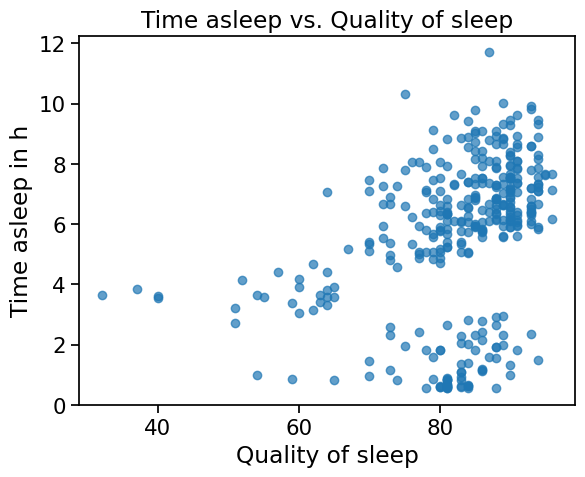

In [ ]:
# Create a scatter plot to compare the total sleep time to the sleep quality 
plt.scatter(data_total["sleep_quality"], data_total["total_asleep"]/60, alpha=0.7)
plt.title("Time asleep vs. Quality of sleep")
plt.xlabel("Quality of sleep")
plt.ylabel("Time asleep in h")
plt.show()

The scatterplot shows, that I had the worst quality of sleep while sleeping for around 200 minutes. </br>
However we need to remember, that there is not a strong correlation between sleep quality and time asleep as shown before. </br>
So the assumption that a total time asleep around 200 min leads to poor quality is wrong as shown by other datapoints where my sleep quality was > 60 for around 200 min total time asleep. </br>

Since the total time asleep is the total of rem, hight, and light sleep, I will plot those scatter plots into 1 chart. Additional I will display the awake time to spot some possible patterns. </br>
Because the percantage of each sleep phase could also have an impact on my sleep quality, I will also display the percantage.  

In [ ]:
#creating a dataframe with percantage of each sleep phase 
data_percent = data_total.copy()
data_percent['min_awake'] = round(data_percent['min_awake'] / data_percent['min_in_bed'] * 100, 2)
data_percent['min_rem_sleep'] = round(data_percent['min_rem_sleep'] / data_percent['min_in_bed'] * 100, 2)
data_percent['min_light_sleep'] = round(data_percent['min_light_sleep'] / data_percent['min_in_bed'] * 100, 2)
data_percent['min_deep_sleep'] = round(data_percent['min_deep_sleep'] / data_percent['min_in_bed'] * 100, 2)

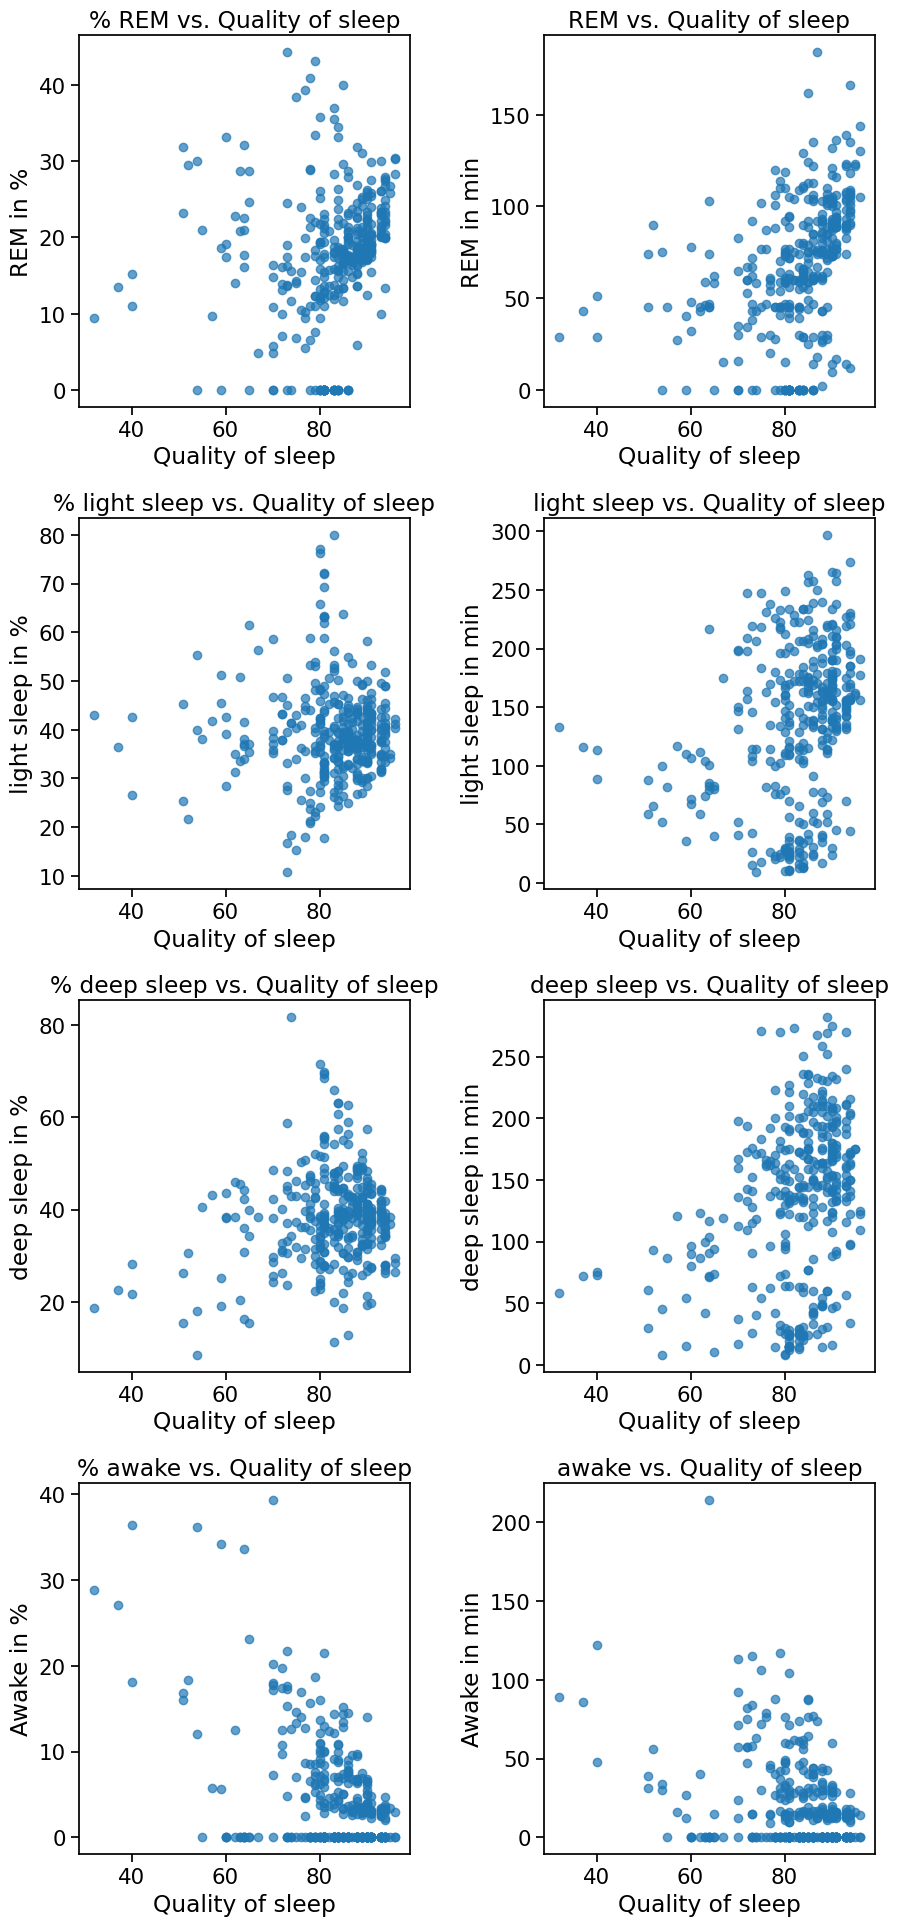

In [ ]:
# Create a scatter plot to compare the sleep phases (in min & in %) to the sleep quality 
fig, axs = plt.subplots(4,2, figsize=(10,20))
fig.tight_layout(pad=3.0)

axs[0,0].scatter(data_percent["sleep_quality"], data_percent["min_rem_sleep"], alpha=0.7)
axs[0,0].set_title("% REM vs. Quality of sleep")
axs[0,0].set(xlabel='Quality of sleep', ylabel='REM in %')
axs[0,1].scatter(data_total["sleep_quality"], data_total["min_rem_sleep"], alpha=0.7)
axs[0,1].set_title("REM vs. Quality of sleep")
axs[0,1].set(xlabel='Quality of sleep', ylabel='REM in min')

axs[1,0].scatter(data_percent["sleep_quality"], data_percent["min_light_sleep"], alpha=0.7)
axs[1,0].set_title("% light sleep vs. Quality of sleep")
axs[1,0].set(xlabel='Quality of sleep', ylabel='light sleep in %')
axs[1,1].scatter(data_total["sleep_quality"], data_total["min_light_sleep"], alpha=0.7)
axs[1,1].set_title("light sleep vs. Quality of sleep")
axs[1,1].set(xlabel='Quality of sleep', ylabel='light sleep in min')

axs[2,0].scatter(data_percent["sleep_quality"], data_percent["min_deep_sleep"], alpha=0.7)
axs[2,0].set_title("% deep sleep vs. Quality of sleep")
axs[2,0].set(xlabel='Quality of sleep', ylabel='deep sleep in %')
axs[2,1].scatter(data_total["sleep_quality"], data_total["min_deep_sleep"], alpha=0.7)
axs[2,1].set_title("deep sleep vs. Quality of sleep")
axs[2,1].set(xlabel='Quality of sleep', ylabel='deep sleep in min')

axs[3,0].scatter(data_percent["sleep_quality"], data_percent["min_awake"], alpha=0.7)
axs[3,0].set_title("% awake vs. Quality of sleep")
axs[3,0].set(xlabel='Quality of sleep', ylabel='Awake in %')
axs[3,1].scatter(data_total["sleep_quality"], data_total["min_awake"], alpha=0.7)
axs[3,1].set_title("awake vs. Quality of sleep")
axs[3,1].set(xlabel='Quality of sleep', ylabel='Awake in min')
    

plt.show()

The displayed scatterplots don't show a strong correlation between each sleep phase to the sleep quality. </br>
There is only a tendency, that a higher percantage of being awake can result in a worse sleep quality. </br>
So lets check the correlation matrix for the percentage sleep phases: 

In [ ]:
data_percent.corr()

,min_in_bed,sleep_quality,min_awake,min_rem_sleep,min_light_sleep,min_deep_sleep,total_asleep
min_in_bed,1.000000,0.274457,0.239902,0.277779,-0.228333,-0.182406,0.987794
sleep_quality,0.274457,1.000000,-0.520989,0.183091,0.009418,0.182947,0.355570
min_awake,0.239902,-0.520989,1.000000,-0.153617,-0.093879,-0.450925,0.106881
min_rem_sleep,0.277779,0.183091,-0.153617,1.000000,-0.504695,-0.283731,0.306392
min_light_sleep,-0.228333,0.009418,-0.093879,-0.504695,1.000000,-0.461404,-0.212947
min_deep_sleep,-0.182406,0.182947,-0.450925,-0.283731,-0.461404,1.000000,-0.132356
total_asleep,0.987794,0.355570,0.106881,0.306392,-0.212947,-0.132356,1.000000


We can see, that the strongest (negativ) linear correlation for my sleep quality is the percentage of being awake. </br>
But a correlation from -0.52 is still only moderatly.

## 4.3. Sleep Quality - Month of the year 

Maybe we can learn more about my sleep behaviour and quality by looking at the months? 

In [ ]:
data_month = data_total.copy() 
data_month["month"] = data_month["start"].dt.month # Extract the month 
data_grouped_month = data_month.groupby("month").mean() # grouping by month & aggregate the mean

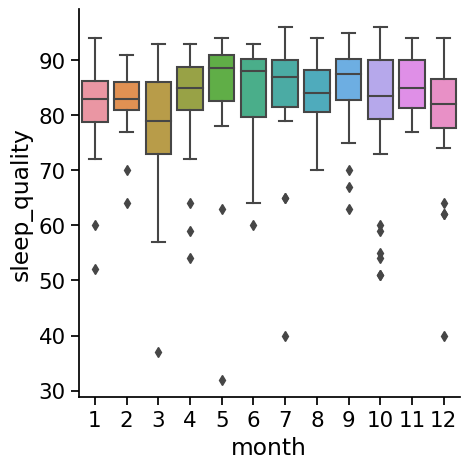

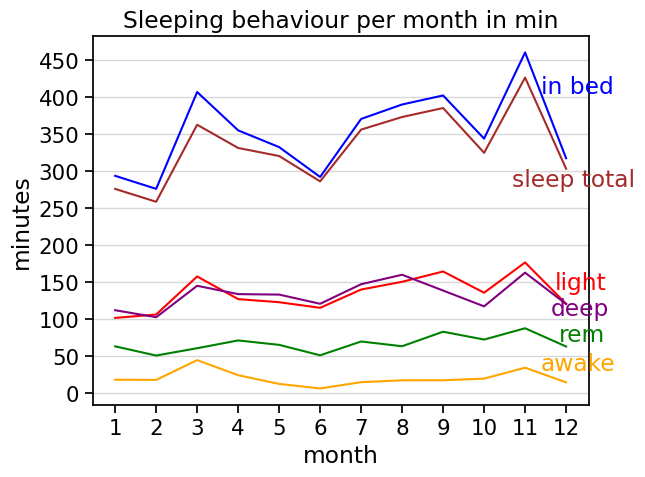

In [ ]:
#Creating a boxplot chart to spot the average sleep quality per month
sns.catplot(data=data_month, x="month", y="sleep_quality", kind="box")
plt.show()

# Creating a line chart to compare the avg values for each month
plt.plot(data_grouped_month["min_in_bed"], label="min in bed", color='blue')
plt.plot(data_grouped_month["min_awake"], label="min awake", color='orange')
plt.plot(data_grouped_month["min_rem_sleep"], label="min rem sleep", color='green')
plt.plot(data_grouped_month["min_light_sleep"], label="min light sleep", color='red')
plt.plot(data_grouped_month["min_deep_sleep"], label="min deep sleep", color='purple')
plt.plot(data_grouped_month["total_asleep"], label="min total sleep", color='brown')
plt.text(11.4, 405, 'in bed', color='blue')
plt.text(10.69, 280, 'sleep total', color='brown')
plt.text(11.73, 140, 'light', color='red')
plt.text(11.63, 105.5, 'deep', color='purple')
plt.text(11.82715, 70, 'rem', color='green')
plt.text(11.38, 30, 'awake', color='orange')
plt.xlabel('month')
plt.ylabel('minutes')
plt.xticks(np.arange(1, 13, 1))
plt.yticks(np.arange(0, 500, 50))
plt.grid(True, axis= "y", alpha=0.5)
plt.title('Sleeping behaviour per month in min')
plt.show()

The average sleep quality per month was quite stable between 80 and 90. </br>
The only outstanding month is march. Having the highest IQR, the biggest distance between both whiskers and the lowest median sleep quality </br>
This can be explained due to my covid-19 infection in march while being in Cambodia and not having a high sleeping comfort. 

## 4.4. Sleep Quality - Weekday
Does my sleep behaivour and my sleep quality differ by weekday? 

In [ ]:
#Grouping the dataset to weekdays
data_weekday = data_total.copy()
data_weekday["day"] = data_weekday["start"].dt.weekday # Extract the weekday
data_weekday["day"] = data_weekday["day"].replace([0, 1, 2, 3, 4, 5, 6], ["1.Monday", "2.Tuesday", "3.Wednesday", "4.Thursday", "5.Friday", "6.Saturday", "7.Sunday"])
data_grouped_weekday = data_weekday.groupby("day").mean() # grouping by weekday & aggregate the mean

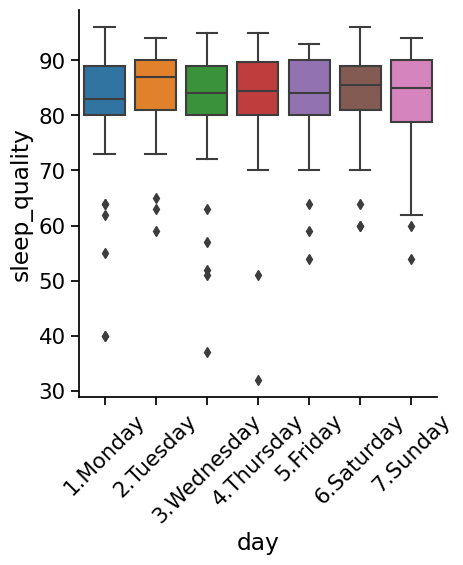

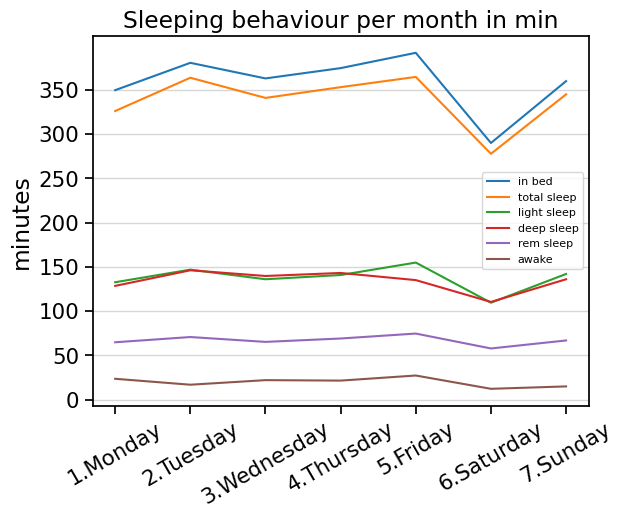

In [ ]:
# Creating a barplot chart to compare avg values for each weekday 
sns.catplot(data=data_weekday, x="day", y="sleep_quality", kind="box", order=("1.Monday", "2.Tuesday", "3.Wednesday", "4.Thursday", "5.Friday", "6.Saturday", "7.Sunday"))
plt.xticks(rotation=45)
plt.show()

# Creating a linechart to compare avg values for each weekday 
plt.plot(data_grouped_weekday["min_in_bed"], label="in bed")
plt.plot(data_grouped_weekday["total_asleep"], label="total sleep")
plt.plot(data_grouped_weekday["min_light_sleep"], label="light sleep")
plt.plot(data_grouped_weekday["min_deep_sleep"], label="deep sleep")
plt.plot(data_grouped_weekday["min_rem_sleep"], label="rem sleep")
plt.plot(data_grouped_weekday["min_awake"], label="awake")
plt.legend(loc="best", fontsize='8' )
plt.ylabel('minutes')
plt.xticks(np.arange(0, 7, 1), rotation=30)
plt.yticks(np.arange(0, 400, 50))
plt.grid(True, axis= "y", alpha=0.5)
plt.title('Sleeping behaviour per month in min')
plt.show()

Surprisingly my total sleep is the shortest on saturdays. 

Similar to the months, my average sleep quality is quite stable from weekday to weekday. </br>
Another factor could be the time I went to bed / woke up:

## 4.5. When did I go to bed - When did I wake up? 

In [ ]:
# Pulling the full hour for each row and adding it to extra columns
data_time = data_total.copy()
data_time['start'].to_timestamp
data_time['end'].to_timestamp
data_time["start_time"] = data_time["start"].dt.hour
data_time["end_time"] = data_time["end"].dt.hour

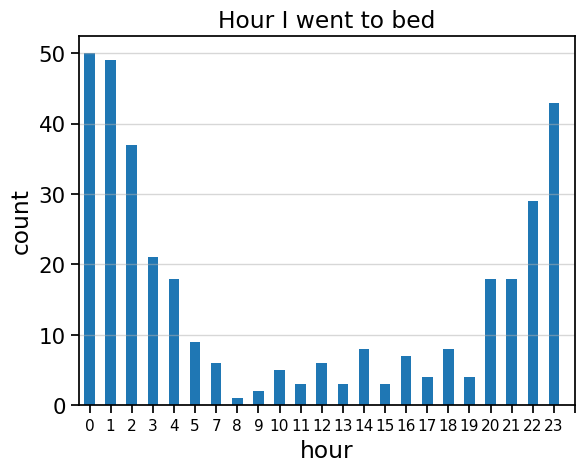

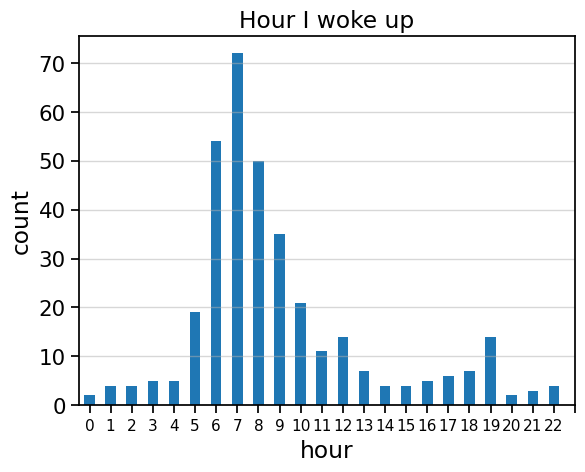

In [ ]:
# Creating a histogram to see at wich time I most often went to bed
data_time['start_time'].value_counts().sort_index().plot(kind='bar')
plt.grid(axis='y', alpha=0.5)
plt.xticks(np.arange(0, 24, 1),rotation = 360, fontsize = 11)
plt.title('Hour I went to bed')
plt.xlabel('hour')
plt.ylabel('count')
plt.show()

# Creating a histogram to see at wich time I most often woke up
data_time['end_time'].value_counts().sort_index().plot(kind='bar')
plt.grid(axis='y', alpha=0.5)
plt.xticks(np.arange(0, 24, 1),rotation = 360, fontsize = 11)
plt.title('Hour I woke up')
plt.xlabel('hour')
plt.ylabel('count')
plt.show()

As we can see I went to bed the most between 10pm and 3am. </br>
Most times I woke up around 6am to 9am 

#### How long did I sleep 

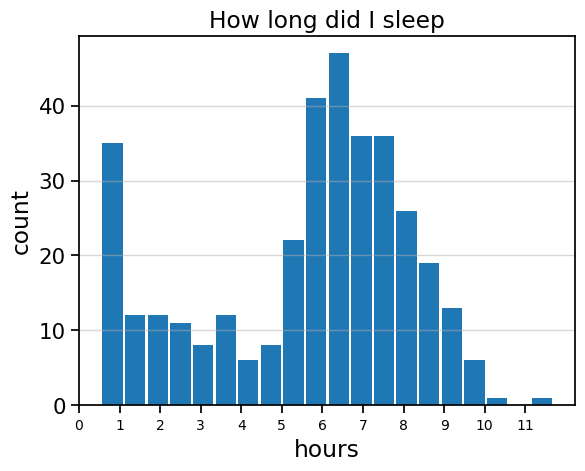

In [ ]:
plt.hist(data_time['total_asleep']/60, bins=20, rwidth=0.9)
plt.xticks(np.arange(0, 12, 1), fontsize=10)
plt.grid(axis='y', alpha=0.5)
plt.title('How long did I sleep')
plt.xlabel('hours')
plt.ylabel('count')
plt.show()

## 4.6. Sleep Quality - Time I went to bed

In [ ]:
# Group data by time I went to bed and aggregate the avg 
data_grouped_start_time = data_time.groupby("start_time").mean() 

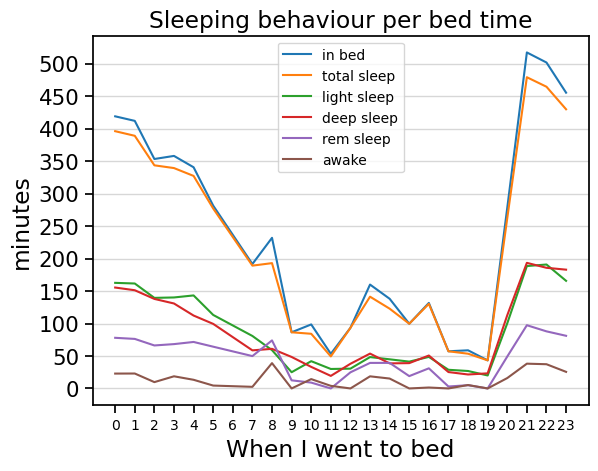

In [ ]:
plt.plot(data_grouped_start_time["min_in_bed"], label="in bed")
plt.plot(data_grouped_start_time["total_asleep"], label="total sleep")
plt.plot(data_grouped_start_time["min_light_sleep"], label="light sleep")
plt.plot(data_grouped_start_time["min_deep_sleep"], label="deep sleep")
plt.plot(data_grouped_start_time["min_rem_sleep"], label="rem sleep")
plt.plot(data_grouped_start_time["min_awake"], label="awake")
plt.legend(loc="best", fontsize='10' )
plt.xlabel('When I went to bed')
plt.ylabel('minutes')
plt.xticks(np.arange(0, 24, 1), fontsize=10)
plt.yticks(np.arange(0, 550, 50))
plt.grid(True, axis= "y", alpha=0.5)
plt.title('Sleeping behaviour per bed time')
plt.show()

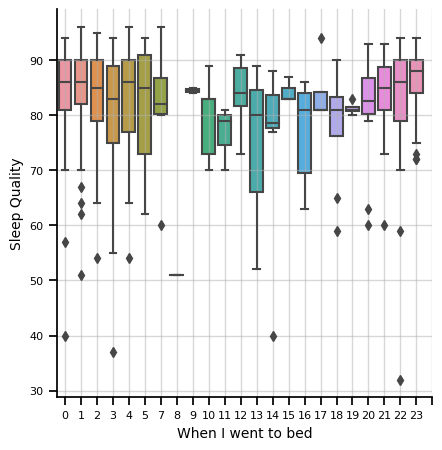

In [ ]:
sns.catplot(data=data_time, x="start_time", y="sleep_quality", kind="box")
plt.grid(True, alpha=0.5)
plt.xticks(np.arange(0, 24, 1), fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('When I went to bed', fontsize=10)
plt.ylabel('Sleep Quality', fontsize=10)
plt.show()

Next we are going to look at the time I woke up:

## 4.7. Sleep Quality - Time I woke up 

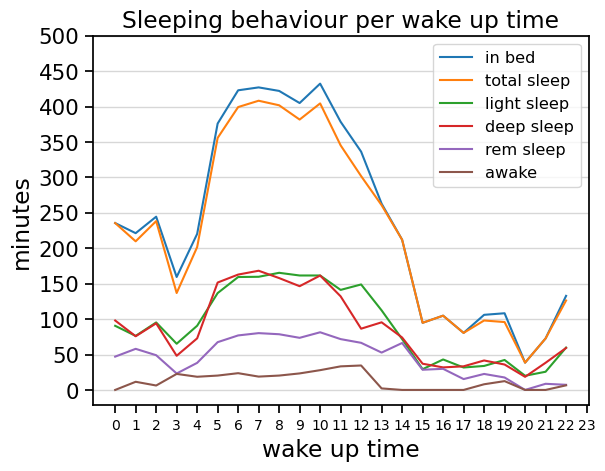

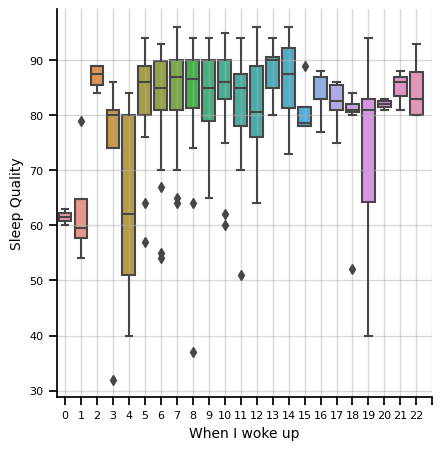

In [ ]:
# Grouping data by the time I woke up and creating plots with average values
data_grouped_end_time = data_time.groupby("end_time").mean() 
plt.plot(data_grouped_end_time["min_in_bed"], label="in bed")
plt.plot(data_grouped_end_time["total_asleep"], label="total sleep")
plt.plot(data_grouped_end_time["min_light_sleep"], label="light sleep")
plt.plot(data_grouped_end_time["min_deep_sleep"], label="deep sleep")
plt.plot(data_grouped_end_time["min_rem_sleep"], label="rem sleep")
plt.plot(data_grouped_end_time["min_awake"], label="awake")
plt.legend(loc="best", fontsize='x-small' )
plt.xlabel('wake up time')
plt.ylabel('minutes')
plt.xticks(np.arange(0, 24, 1), fontsize=10)
plt.yticks(np.arange(0, 550, 50))
plt.grid(True, axis= "y", alpha=0.5)
plt.title('Sleeping behaviour per wake up time')
plt.show()

sns.catplot(data=data_time, x="end_time", y="sleep_quality", kind="box")
plt.grid(True, alpha=0.5)
plt.xticks(np.arange(0, 24, 1), fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('When I woke up', fontsize=10)
plt.ylabel('Sleep Quality', fontsize=10)
plt.show()

Waking up at 1am and 4am seem to result in the worst sleep qualitys. </br>
Waking up at 4am and 7pm results in the biggest IQR. However we need to rember, that the waking up data from 1pm to 4am is very limited (as shown in the histogram when I woke up)

## 4.8. What is the difference between sleep sessions with a sleep quality of more and less then 50?: 

In [ ]:
print(data_total[data_total["sleep_quality"] <= 50].mean() - data_total[data_total["sleep_quality"] >= 50].mean())

min_in_bed         -49.864943
sleep_quality      -45.959770
min_awake           67.614943
min_rem_sleep      -28.853448
min_light_sleep    -24.094828
min_deep_sleep     -64.721264
total_asleep      -117.479885
dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_3256\3570502270.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  print(data_total[data_total["sleep_quality"] <= 50].mean() - data_total[data_total["sleep_quality"] >= 50].mean())


On average on sleep sessions with a sleep quality of < 50: </br>
    - I spent around 50 min less in bed </br>
    - I am around 67 min more awake during the session </br>
    - have close to 30 min less REM-sleep </br>
    - have close to 25 min less light sleep </br>
    - have over one hour less deep sleep </br>
    - have close to two hours less total sleep </br>

## 4.9. Correlation between previous / next Sleep Quality? 

In [ ]:
data_total['next_sleep_quality'] =  data_total['sleep_quality'].shift(-1)
data_total['last_sleep_quality'] =  data_total['sleep_quality'].shift()
data_total.head()

,start,end,min_in_bed,sleep_quality,min_awake,min_rem_sleep,min_light_sleep,min_deep_sleep,total_asleep,next_sleep_quality,last_sleep_quality
0,2021-08-11 02:18:20,2021-08-11 09:30:24,432,72,75,60,164,133,357,76.0,NaN
1,2021-08-12 00:46:51,2021-08-12 08:16:45,450,76,76,47,163,163,374,93.0,72.0
2,2021-08-13 00:09:07,2021-08-13 07:35:22,446,93,13,90,156,187,433,85.0,76.0
3,2021-08-14 01:23:53,2021-08-14 07:43:48,380,85,19,55,162,144,361,87.0,93.0
4,2021-08-14 15:08:56,2021-08-14 16:43:47,95,87,0,18,51,25,95,81.0,85.0


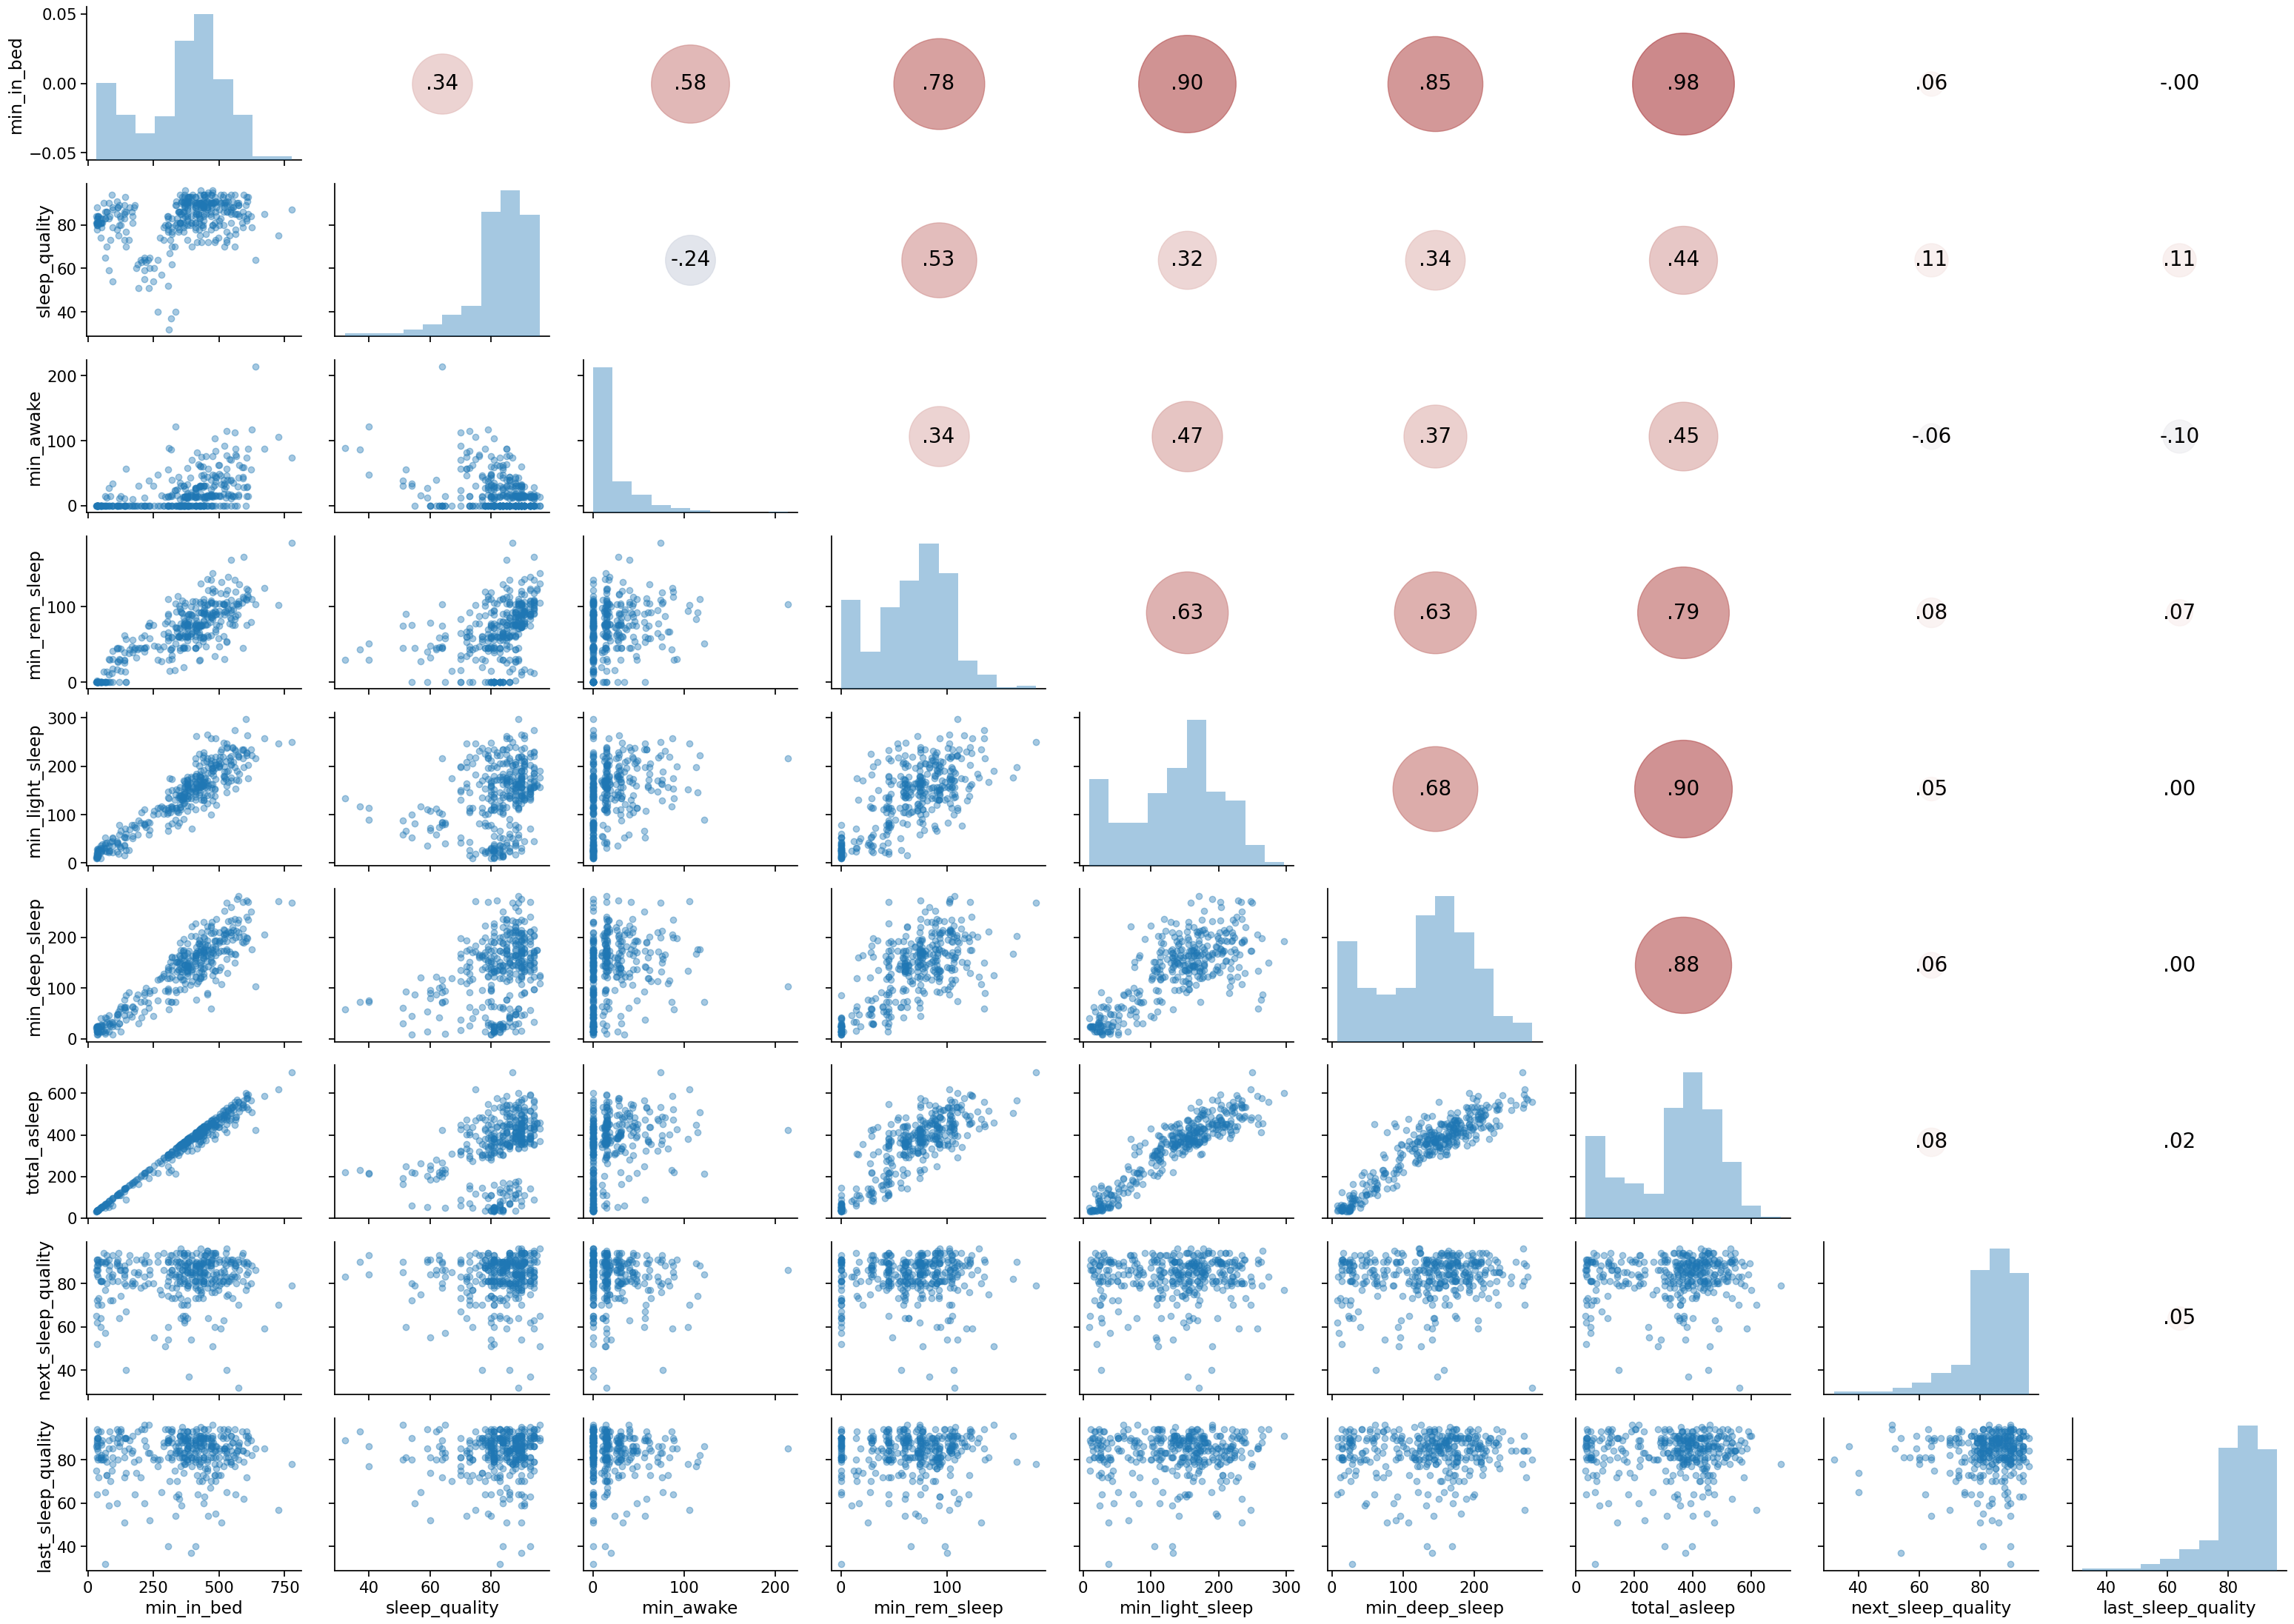

In [ ]:
#Credits: To User "mwaskom" on https://github.com/mwaskom/seaborn/issues/1444
from scipy.stats import spearmanr

def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'spearman')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter(.5, .5, marker_size, corr_r, alpha=0.6, cmap="vlag", vmin=-1, vmax=1, transform=ax.transAxes)
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction", ha='center', va='center', fontsize=20)

data = data_total
g = sns.PairGrid(data, aspect=1.4, diag_sharey=False)
g.map_lower(plt.scatter, alpha=0.4)
g.map_diag(plt.hist, alpha=0.4)
g.map_upper(corrdot)

There is close to none correlation between the sleep quality of the next and previous sleep qualities compared to the present sleep session. 

# 5. Activity data 
On my mission to find patterns/data that has an influence on the quality of my sleep, I decided to clean and import a selection of my "Health"-Data collected by the Apple Health App through my phone & smart watch. 

In [ ]:
activity = pd.read_csv(pwd + "/Data/clean_activity.csv")
activity.drop(columns='Unnamed: 0', inplace=True)
activity['date'] = pd.to_datetime(activity['date']).dt.date
activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   date                          364 non-null    object 
 1   active_energy_kj              363 non-null    float64
 2   exercise_time_min             325 non-null    float64
 3   stand_time_min                361 non-null    float64
 4   basal_energy_burned_kj        362 non-null    float64
 5   resting_heart_rate_count_min  350 non-null    float64
 6   asleep_min_acitvity           223 non-null    float64
 7   min_in_bed_activity           223 non-null    float64
 8   step_count                    364 non-null    float64
dtypes: float64(8), object(1)
memory usage: 25.7+ KB


To find possible influences on my sleep quality from the activity dataset, we need to think about how to join both datasets. </br>
Our Sleep Data provides a timestamp/Datetime for each tracked sleeping session. </br> 
The activity dataset sums the activity by dates. </br>

Just joining by the dates could cause bias: </br>
 Example: If I went to bed in the night from Monday to Tuesday at 00:14am, the activity data from Tuesday would join the row - And activity that I had after my sleep can hardly have an impact on my sleep. </br>

 To avoid the bias I will split the start time: </br>
 - If I went to bed BEFORE 12am / midday -> I'll join the activity data on the day before </br>
 - If I went to bed AFTER 12am / midday -> I'll join the activity data on the same day.  



## 5.1. Joining activity dataset and sleep dataset 

In [ ]:
# Extracting start time and start date from start
data_join = data_total.copy()
data_join['start'].to_timestamp
data_join["start_time"] = data_join["start"].dt.time
data_join["start_date"] = data_join["start"].dt.date


In [ ]:
# Checking if I went to bed between midnight and midday -> Select the day before/current day
data_join.loc[data_join['start_time'] < datetime.time(12, 00, 00), 'join_date'] = data_join['start_date'] - timedelta(days=1) 
data_join.loc[data_join['start_time'] >= datetime.time(12, 00, 00), 'join_date'] = data_join['start_date']
data_join['join_date'] = pd.to_datetime(data_join['join_date']).dt.date
data_join.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start               352 non-null    datetime64[ns]
 1   end                 352 non-null    datetime64[ns]
 2   min_in_bed          352 non-null    int64         
 3   sleep_quality       352 non-null    int64         
 4   min_awake           352 non-null    int64         
 5   min_rem_sleep       352 non-null    int64         
 6   min_light_sleep     352 non-null    int64         
 7   min_deep_sleep      352 non-null    int64         
 8   total_asleep        352 non-null    int64         
 9   next_sleep_quality  351 non-null    float64       
 10  last_sleep_quality  351 non-null    float64       
 11  start_time          352 non-null    object        
 12  start_date          352 non-null    object        
 13  join_date           352 non-null    object        

In [ ]:
# Lets join: 
data_joined = data_join.merge(activity, how='inner', left_on='join_date', right_on='date')

## 5.2. Inspect and clean joined dataset 

Because we joined the activity data from before I went to bed, the results in the columns "total_asleep" + "asleep_min_activity" && "min_in_bed" + "min_in_bed_activity" should be different. So lets check this: 

In [ ]:
# having a look at the dataframe: 
data_joined[['start', 'join_date', 'date', 'min_in_bed', 'min_in_bed_activity', 'total_asleep', 'asleep_min_acitvity']].head(10)

,start,join_date,date,min_in_bed,min_in_bed_activity,total_asleep,asleep_min_acitvity
0,2021-10-03 05:06:25,2021-10-02,2021-10-02,155,NaN,155,NaN
1,2021-10-03 23:25:42,2021-10-03,2021-10-03,484,154.636064,452,154.636064
2,2021-10-05 21:21:38,2021-10-05,2021-10-05,563,NaN,484,NaN
3,2021-10-06 23:05:49,2021-10-06,2021-10-06,454,641.876731,438,484.180188
4,2021-10-07 22:25:19,2021-10-07,2021-10-07,409,469.958878,382,438.258899
5,2021-10-08 22:04:32,2021-10-08,2021-10-08,484,435.952679,380,382.336034
6,2021-10-10 20:03:52,2021-10-10,2021-10-10,251,NaN,251,NaN
7,2021-10-11 03:09:01,2021-10-10,2021-10-10,215,NaN,215,NaN
8,2021-10-11 22:23:43,2021-10-11,2021-10-11,486,465.657898,449,465.657898
9,2021-10-12 20:53:52,2021-10-12,2021-10-12,546,523.059248,475,448.359253


As we can see the columns are differnt. </br>
The activity columns refer to the last tracked activity entry before I went to bed. </br>
Because the data of the activity column has a few NaN-Values, the way the sleep is tracked seems to be a bit different and multiple sleepsessions on the same day are simply add together, I decide to drop the activity columns. </br>
An analysis of a possible impact in sleep quality by the last sleep session will be performed later on

In [ ]:
data_joined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287 entries, 0 to 286
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   start                         287 non-null    datetime64[ns]
 1   end                           287 non-null    datetime64[ns]
 2   min_in_bed                    287 non-null    int64         
 3   sleep_quality                 287 non-null    int64         
 4   min_awake                     287 non-null    int64         
 5   min_rem_sleep                 287 non-null    int64         
 6   min_light_sleep               287 non-null    int64         
 7   min_deep_sleep                287 non-null    int64         
 8   total_asleep                  287 non-null    int64         
 9   next_sleep_quality            287 non-null    float64       
 10  last_sleep_quality            287 non-null    float64       
 11  start_time                    28

In [ ]:
# Dropping columns: 
data_joined.drop(columns=['min_in_bed_activity', 'asleep_min_acitvity', 'date', 'join_date', 'start_date', 'start_time' ], inplace=True)

To tidy up the DataFrame I decided to drop more unnecessary columns, that I needed to join both DataFrames ('date', 'join_date', 'start_date', 'start_time')

After that it's time to get a feeling for the new DataFrame: 

## 5.3. Correlation between datasets 

<AxesSubplot:>

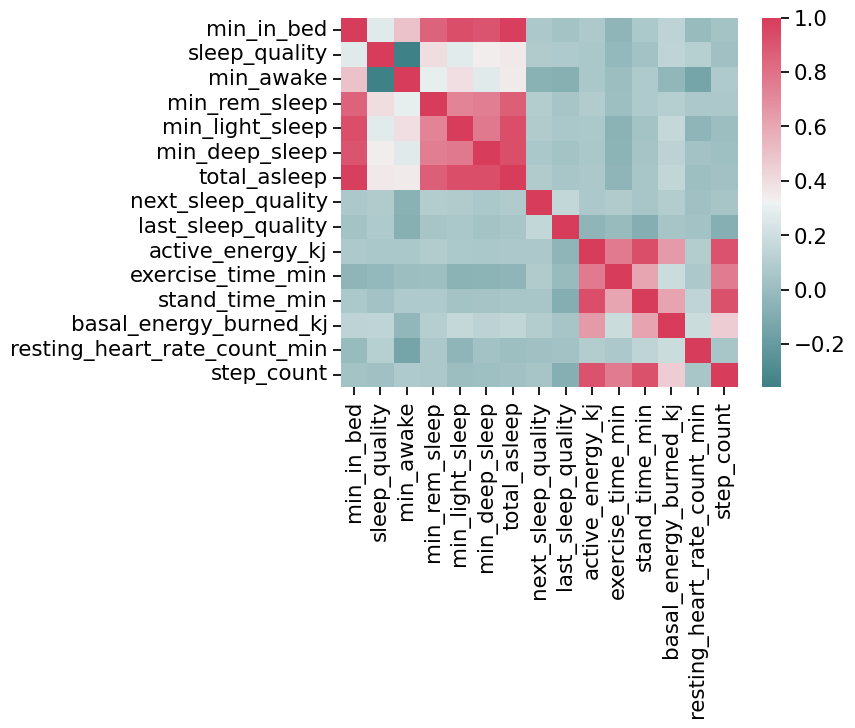

In [ ]:
# Starting by creating a heatmap to easily spot correlations
corr = data_joined.corr()
cmap = sns.diverging_palette(200, 5, as_cmap=True)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=cmap)

Surprsingly the correaltions between my sleep quality and the data from the activity dataset is weak to moderate. 
Maybe we can spot patterns by having a more detailed look into it: 

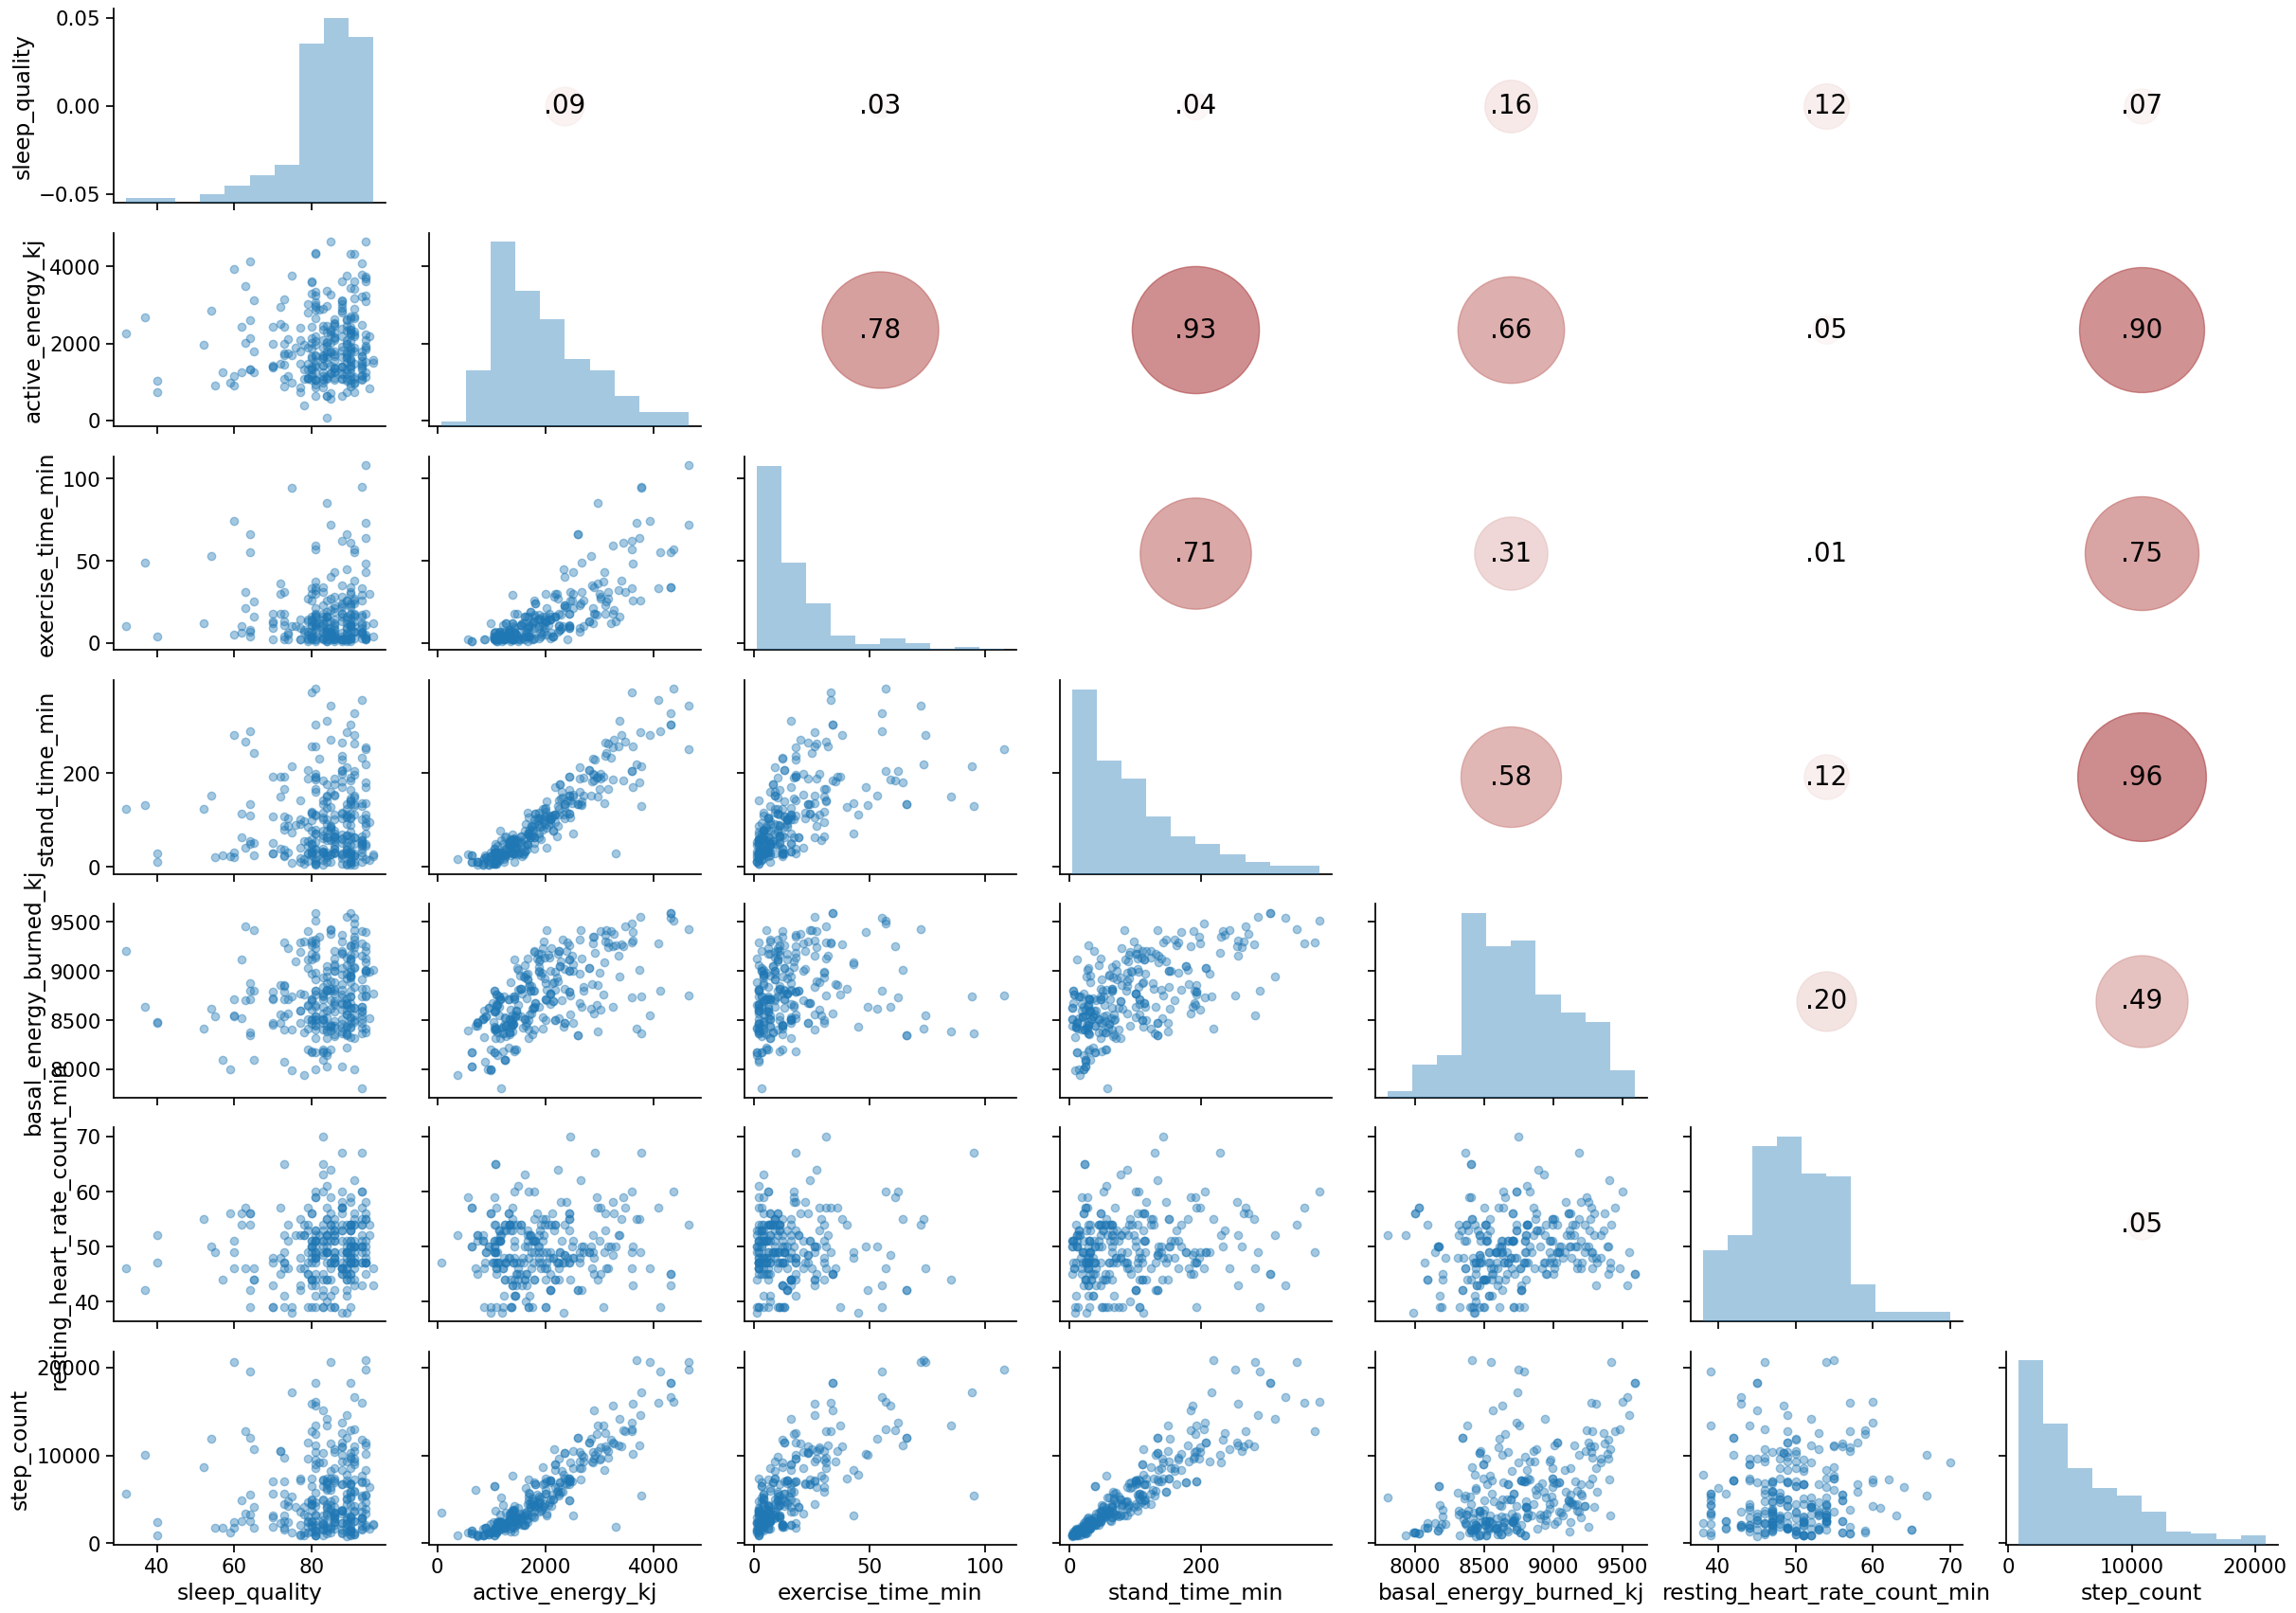

In [ ]:
#Credits: To User "mwaskom" on https://github.com/mwaskom/seaborn/issues/1444
from scipy.stats import spearmanr

def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'spearman')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter(.5, .5, marker_size, corr_r, alpha=0.6, cmap="vlag", vmin=-1, vmax=1, transform=ax.transAxes)
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction", ha='center', va='center', fontsize=20)

data = data_joined[['sleep_quality', 'active_energy_kj', 'exercise_time_min', 'stand_time_min', 'basal_energy_burned_kj', 'resting_heart_rate_count_min', 'step_count']]
g = sns.PairGrid(data, aspect=1.4, diag_sharey=False)
g.map_lower(plt.scatter, alpha=0.4)
g.map_diag(plt.hist, alpha=0.4)
g.map_upper(corrdot)

Looking at the correlations and the scatterplot, we can see that there is no big impact from any of the activity columns on my sleep quality. 

# 6. Conclusion
### So what did I learn from my analysis? </br>
Alot and close to nothing. Execpt the obvious: Training my python-skills and not getting covid in Cambodia, the selected data didn't provide the answer to my questions: What influences a good sleep quality and what exactly is a "good sleep quality". </br>
I found small hints like: The percentage of being awake per session could influence the sleep quality, activity has by far not as much as an impact then expected and that my sleeping behaviour is more "normal" then I expected it to be. 

I think by now I ran out of options and the only way to find out how the app Pillow measures the sleep quality is by googling it.... </br>
[Here](https://intercom.help/pillow_app/en/articles/3733514-how-does-pillow-calculate-sleep-quality) is the answer to my question. Provided by the Pillow Support Team.
The sleep quality is measured by: 
1. Motions during sleep 
2. Noise level 
3. Sleep stage durations: 
    - 5% Awake 
    - 25% REM 
    - 35% Deep
    - 35% light sleep 


Sadly the motion during sleep is not included in the dataset. </br>
Digging a bit deeper in the topic I found out, that following factors also affect the sleep quality *(source: sleepfoundation.org. [Link](https://www.sleepfoundation.org/sleep-hygiene/how-is-sleep-quality-calculated))*: 
- Irregular sleep schedule 
- Sleeping environment 
- Caffeine / alcohol 
- drugs 
- snoring 
- sleep / mental health disorders. 

Thank you for joining me on the journey through my sleep activity! 